In [56]:
# Basic Packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Additional Packages
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler # Scales data for PCA
from sklearn.decomposition import PCA # PCA package
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix


## Import Data and Explore

In [44]:
df = pd.read_excel("data.xlsx")

In [45]:
df.columns

Index(['subject', 'age', 'label', 'RBC2barrier', 'Inflation', 'bandwidth',
       'ven_defect', 'ven_low', 'ven_high', 'ven_SNR', 'ven_mean',
       'ven_median', 'ven_SD', 'bar_defect', 'bar_low', 'bar_high', 'bar_SNR',
       'bar_mean', 'bar_median', 'bar_SD', 'bar_negative', 'rbc_defect',
       'rbc_low', 'rbc_high', 'rbc_SNR', 'rbc_mean', 'rbc_median', 'rbc_SD',
       'rbc_negative', 'fvc', 'fe1', 'fev1-fvc', 'fev25-75'],
      dtype='object')

In [46]:
df['label'].value_counts()

IPF     71
NSIP    36
Name: label, dtype: int64

In [47]:
df = df.dropna(subset = ['label'])
df.isna().mean().round(4) * 100

subject           0.00
age             100.00
label             0.00
RBC2barrier      16.82
Inflation        16.82
bandwidth        16.82
ven_defect       16.82
ven_low          16.82
ven_high         16.82
ven_SNR          16.82
ven_mean         16.82
ven_median       16.82
ven_SD           16.82
bar_defect       16.82
bar_low          16.82
bar_high         16.82
bar_SNR          16.82
bar_mean         16.82
bar_median       16.82
bar_SD           16.82
bar_negative     16.82
rbc_defect       16.82
rbc_low          16.82
rbc_high         16.82
rbc_SNR          16.82
rbc_mean         16.82
rbc_median       16.82
rbc_SD           16.82
rbc_negative     16.82
fvc              20.56
fe1              20.56
fev1-fvc         20.56
fev25-75         22.43
dtype: float64

In [48]:
df.drop(columns = ['age'], inplace = True)

## Imputation of Missing Data

In [52]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(strategy = 'most_frequent')
imp_mean.fit(df)
total_df = pd.DataFrame(imp_mean.transform(df))
total_df.columns = df.columns
total_df

,subject,label,RBC2barrier,Inflation,bandwidth,ven_defect,ven_low,ven_high,ven_SNR,ven_mean,...,rbc_high,rbc_SNR,rbc_mean,rbc_median,rbc_SD,rbc_negative,fvc,fe1,fev1-fvc,fev25-75
0,002-034,IPF,0.21093,1.49814,797.194,0.130264,0.260604,0.0436658,16.0091,0.458269,...,0.0214333,4.92724,0.291617,0.272775,0.17703,0.0282859,77,76,104,58
1,002-044,IPF,0.21093,1.49814,797.194,0.130264,0.260604,0.0436658,16.0091,0.458269,...,0.0214333,4.92724,0.291617,0.272775,0.17703,0.0282859,77,76,104,58
2,002-046,IPF,0.21093,1.49814,797.194,0.130264,0.260604,0.0436658,16.0091,0.458269,...,0.0214333,4.92724,0.291617,0.272775,0.17703,0.0282859,77,76,104,58
3,002-047,IPF,0.21093,1.49814,797.194,0.130264,0.260604,0.0436658,16.0091,0.458269,...,0.0214333,4.92724,0.291617,0.272775,0.17703,0.0282859,77,76,104,58
4,002-050,IPF,0.21093,1.49814,797.194,0.130264,0.260604,0.0436658,16.0091,0.458269,...,0.0214333,4.92724,0.291617,0.272775,0.17703,0.0282859,77,76,104,58
5,002-054,IPF,0.21093,1.49814,797.194,0.130264,0.260604,0.0436658,16.0091,0.458269,...,0.0214333,4.92724,0.291617,0.272775,0.17703,0.0282859,77,76,104,58
6,002-056,IPF,0.21093,1.49814,797.194,0.130264,0.260604,0.0436658,16.0091,0.458269,...,0.0214333,4.92724,0.291617,0.272775,0.17703,0.0282859,77,76,104,58
7,002-059,IPF,0.21093,1.49814,797.194,0.130264,0.260604,0.0436658,16.0091,0.458269,...,0.0214333,4.92724,0.291617,0.272775,0.17703,0.0282859,77,76,104,58
8,002-067,IPF,0.21093,1.49814,797.194,0.130264,0.260604,0.0436658,16.0091,0.458269,...,0.0214333,4.92724,0.291617,0.272775,0.17703,0.0282859,77,76,104,58
9,002-068,IPF,0.21093,1.49814,797.194,0.130264,0.260604,0.0436658,16.0091,0.458269,...,0.0214333,4.92724,0.291617,0.272775,0.17703,0.0282859,77,76,104,58


In [77]:
total_df['label'] = pd.Categorical(total_df['label'])
total_df['code_label'] = total_df.label.cat.codes # add column for binary numeric label 
total_df.dtypes

subject           object
label           category
RBC2barrier       object
Inflation         object
bandwidth         object
ven_defect        object
ven_low           object
ven_high          object
ven_SNR           object
ven_mean          object
ven_median        object
ven_SD            object
bar_defect        object
bar_low           object
bar_high          object
bar_SNR           object
bar_mean          object
bar_median        object
bar_SD            object
bar_negative      object
rbc_defect        object
rbc_low           object
rbc_high          object
rbc_SNR           object
rbc_mean          object
rbc_median        object
rbc_SD            object
rbc_negative      object
fvc               object
fe1               object
fev1-fvc          object
fev25-75          object
code_label          int8
dtype: object

### PCA 

In [78]:
features = total_df.columns.get_values()
features = features[2:-1]
features

array(['RBC2barrier', 'Inflation', 'bandwidth', 'ven_defect', 'ven_low',
       'ven_high', 'ven_SNR', 'ven_mean', 'ven_median', 'ven_SD',
       'bar_defect', 'bar_low', 'bar_high', 'bar_SNR', 'bar_mean',
       'bar_median', 'bar_SD', 'bar_negative', 'rbc_defect', 'rbc_low',
       'rbc_high', 'rbc_SNR', 'rbc_mean', 'rbc_median', 'rbc_SD',
       'rbc_negative', 'fvc', 'fe1', 'fev1-fvc', 'fev25-75'], dtype=object)

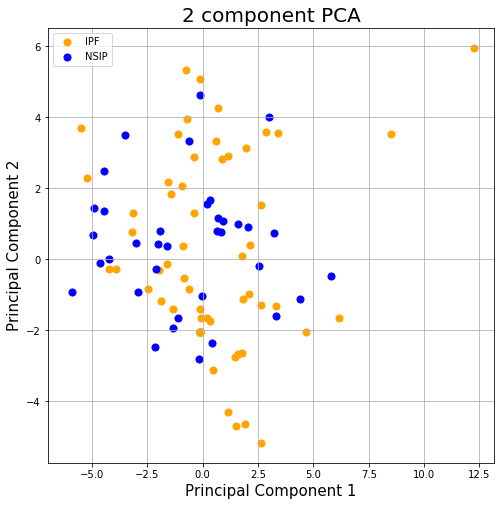

In [85]:

# Separating out the features
x = total_df.loc[:, features].values

# Separating out the target label
y = total_df.loc[:,['label']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)


pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, total_df[['label']]], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['IPF', 'NSIP']
colors = ['orange', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['label'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

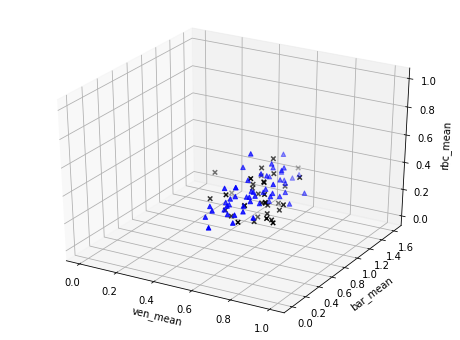

In [11]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

c= df[df['label']=='IPF'];
n= df[df['label']=='NSIP'];

ax.scatter(c['ven_mean'], c['bar_mean'], c['rbc_mean'], c='b', marker='^')
ax.scatter(n['ven_mean'], n['bar_mean'], n['rbc_mean'], c='k', marker='x')

ax.set_xlabel('ven_mean')
ax.set_ylabel('bar_mean')
ax.set_zlabel('rbc_mean')

plt.show()

Text(0, 0.5, 'bar_mean')

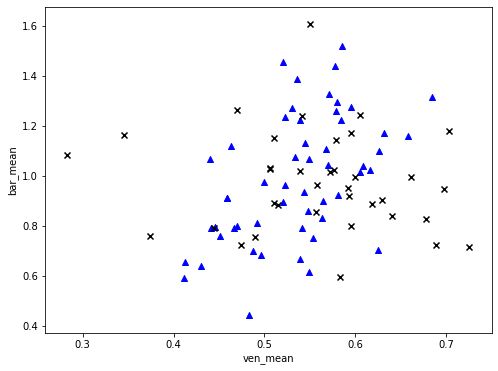

In [12]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

ax.scatter(h['ven_mean'], h['bar_mean'], c='r', marker='o')
ax.scatter(c['ven_mean'], c['bar_mean'], c='b', marker='^')
ax.scatter(n['ven_mean'], n['bar_mean'], c='k', marker='x')

ax.set_xlabel('ven_mean')
ax.set_ylabel('bar_mean')

Text(0, 0.5, 'rbc_mean')

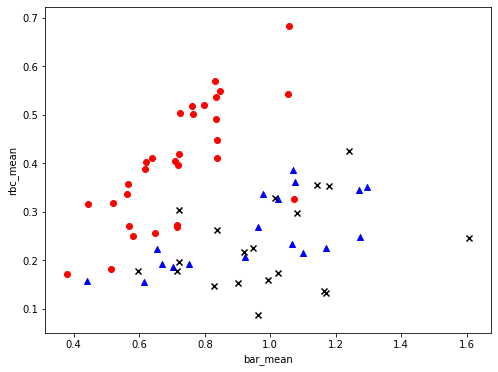

In [29]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

ax.scatter(h['bar_mean'], h['rbc_mean'], c='r', marker='o')
ax.scatter(c['bar_mean'], c['rbc_mean'], c='b', marker='^')
ax.scatter(n['bar_mean'], n['rbc_mean'], c='k', marker='x')

ax.set_xlabel('bar_mean')
ax.set_ylabel('rbc_mean')

## Classical Machine Learning

### SVM

In [30]:
svm_data=df.drop('label', axis=1)

In [31]:
X = svm_data.drop('code_label', axis=1)
y = svm_data['code_label']

In [32]:
svm_data['code_label'].value_counts()

0    30
2    20
1    18
Name: code_label, dtype: int64

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [34]:
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [35]:
y_pred = svclassifier.predict(X_test)

In [36]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[7 0 0]
 [0 0 3]
 [0 0 4]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.00      0.00      0.00         3
           2       0.57      1.00      0.73         4

    accuracy                           0.79        14
   macro avg       0.52      0.67      0.58        14
weighted avg       0.66      0.79      0.71        14



C:\Users\chope\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Ref
https://stackabuse.com/implementing-svm-and-kernel-svm-with-pythons-scikit-learn/